<a href="https://colab.research.google.com/github/robertaparna/snn-transfer-learning/blob/main/bigearthnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install snntorch
!pip install pytorch_lightning
!pip install lightning-bolts

!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
from torch.utils.data import Dataset
import os
import pandas as pd
from torchvision.io import read_image
from PIL import Image
from pathlib import Path
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.io import read_image
import matplotlib.pyplot as plt
from torchvision.models import resnet
import json
from pathlib import Path
import rasterio
from torchvision.datasets.utils import download_and_extract_archive, download_url
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen
import numpy as np
import snntorch as snn
from snntorch import surrogate
from snntorch import functional as SF
from snntorch import utils
from argparse import ArgumentParser
from itertools import chain
from torch import nn, optim
import torchvision
from pytorch_lightning import LightningModule
from pl_bolts.metrics import precision_at_k
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision import transforms as T
import torch.nn.functional as F
from copy import deepcopy
import itertools
from torchmetrics.classification import MultilabelAveragePrecision
import time


/usr/local/lib/python3.10/dist-packages/pl_bolts/__init__.py:11: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/usr/local/lib/python3.10/dist-packages/pl_bolts/__init__.py:11: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/usr/local/lib/python3.10/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/usr/local/lib/python3.10/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:92: UnderReviewWarning: The featu

In [ ]:
#os.listdir('bigearthnet-small')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/bigearthnet-small.zip

Voogesituse väljund on kärbitud viimase 5000 reani.
   creating: bigearthnet-small/S2B_MSIL2A_20180525T94030_47_54/
  inflating: bigearthnet-small/S2B_MSIL2A_20180525T94030_47_54/S2B_MSIL2A_20180525T94030_47_54_B02.tif  
  inflating: bigearthnet-small/S2B_MSIL2A_20180525T94030_47_54/S2B_MSIL2A_20180525T94030_47_54_B03.tif  
  inflating: bigearthnet-small/S2B_MSIL2A_20180525T94030_47_54/S2B_MSIL2A_20180525T94030_47_54_B04.tif  
  inflating: bigearthnet-small/S2B_MSIL2A_20180525T94030_47_54/S2B_MSIL2A_20180525T94030_47_54_labels_metadata.json  
   creating: bigearthnet-small/S2B_MSIL2A_20180525T94030_47_63/
  inflating: bigearthnet-small/S2B_MSIL2A_20180525T94030_47_63/S2B_MSIL2A_20180525T94030_47_63_B02.tif  
  inflating: bigearthnet-small/S2B_MSIL2A_20180525T94030_47_63/S2B_MSIL2A_20180525T94030_47_63_B03.tif  
  inflating: bigearthnet-small/S2B_MSIL2A_20180525T94030_47_63/S2B_MSIL2A_20180525T94030_47_63_B04.tif  
  inflating: bigearthnet-small/S2B_MSIL2A_20180525T94030_47_63/S2B_MSIL2

In [ ]:


LABELS = [
    'Agro-forestry areas', 'Airports',
    'Annual crops associated with permanent crops', 'Bare rock',
    'Beaches, dunes, sands', 'Broad-leaved forest', 'Burnt areas',
    'Coastal lagoons', 'Complex cultivation patterns', 'Coniferous forest',
    'Construction sites', 'Continuous urban fabric',
    'Discontinuous urban fabric', 'Dump sites', 'Estuaries',
    'Fruit trees and berry plantations', 'Green urban areas',
    'Industrial or commercial units', 'Inland marshes', 'Intertidal flats',
    'Land principally occupied by agriculture, with significant areas of '
    'natural vegetation', 'Mineral extraction sites', 'Mixed forest',
    'Moors and heathland', 'Natural grassland', 'Non-irrigated arable land',
    'Olive groves', 'Pastures', 'Peatbogs', 'Permanently irrigated land',
    'Port areas', 'Rice fields', 'Road and rail networks and associated land',
    'Salines', 'Salt marshes', 'Sclerophyllous vegetation', 'Sea and ocean',
    'Sparsely vegetated areas', 'Sport and leisure facilities',
    'Transitional woodland/shrub', 'Vineyards', 'Water bodies', 'Water courses'
]

NEW_LABELS = [
    'Urban fabric',
    'Industrial or commercial units',
    'Arable land',
    'Permanent crops',
    'Pastures',
    'Complex cultivation patterns',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Agro-forestry areas',
    'Broad-leaved forest',
    'Coniferous forest',
    'Mixed forest',
    'Natural grassland and sparsely vegetated areas',
    'Moors, heathland and sclerophyllous vegetation',
    'Transitional woodland/shrub',
    'Beaches, dunes, sands',
    'Inland wetlands',
    'Coastal wetlands',
    'Inland waters',
    'Marine waters'
]

GROUP_LABELS = {
    'Continuous urban fabric': 'Urban fabric',
    'Discontinuous urban fabric': 'Urban fabric',
    'Non-irrigated arable land': 'Arable land',
    'Permanently irrigated land': 'Arable land',
    'Rice fields': 'Arable land',
    'Vineyards': 'Permanent crops',
    'Fruit trees and berry plantations': 'Permanent crops',
    'Olive groves': 'Permanent crops',
    'Annual crops associated with permanent crops': 'Permanent crops',
    'Natural grassland': 'Natural grassland and sparsely vegetated areas',
    'Sparsely vegetated areas': 'Natural grassland and sparsely vegetated areas',
    'Moors and heathland': 'Moors, heathland and sclerophyllous vegetation',
    'Sclerophyllous vegetation': 'Moors, heathland and sclerophyllous vegetation',
    'Inland marshes': 'Inland wetlands',
    'Peatbogs': 'Inland wetlands',
    'Salt marshes': 'Coastal wetlands',
    'Salines': 'Coastal wetlands',
    'Water bodies': 'Inland waters',
    'Water courses': 'Inland waters',
    'Coastal lagoons': 'Marine waters',
    'Estuaries': 'Marine waters',
    'Sea and ocean': 'Marine waters'
}

RGB_BANDS = ['B04', 'B03', 'B02']

BAND_STATS = {
    'mean': {
        'B02': 429.9430203,
        'B03': 614.21682446,
        'B04': 590.23569706,
    },
    'std': {
        'B02': 572.41639287,
        'B03': 582.87945694,
        'B04': 675.88746967,
    }
}

def normalize(img, mean, std):
    min_value = mean - 2 * std
    max_value = mean + 2 * std
    img = (img - min_value) / (max_value - min_value) * 255.0
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

class Bigearthnet(Dataset):

    def __init__(self, root, transform=None, target_transform=None, use_new_labels=True):
        self.root = Path(root)
        self.bands = RGB_BANDS
        self.transform = transform
        self.target_transform = target_transform
        self.use_new_labels = use_new_labels

        samples = []
        for sample in os.listdir(root):
          samples.append(Path(root+"/"+sample))
        self.samples = samples

    def __getitem__(self, index):
        path = self.samples[index]
        patch_id = path.name

        channels = []
        for b in self.bands:
            ch = rasterio.open(path / f'{patch_id}_{b}.tif').read(1)
            ch = normalize(ch, mean=BAND_STATS['mean'][b], std=BAND_STATS['std'][b])
            channels.append(ch)
        img = np.dstack(channels)
        img = Image.fromarray(img)

        with open(path / f'{patch_id}_labels_metadata.json', 'r') as f:
            labels = json.load(f)['labels']
        if self.use_new_labels:
            target = self.get_multihot_new(labels)
        else:
            target = self.get_multihot_old(labels)

        if self.transform is not None:
            img = self.transform(img)
        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target

    def __len__(self):
        return len(self.samples)

    @staticmethod
    def get_multihot_old(labels):
        target = np.zeros((len(LABELS),), dtype=np.float32)
        for label in labels:
            target[LABELS.index(label)] = 1
        return target

    @staticmethod
    def get_multihot_new(labels):
        target = np.zeros((len(NEW_LABELS),), dtype=np.float32)
        for label in labels:
            if label in GROUP_LABELS:
                target[NEW_LABELS.index(GROUP_LABELS[label])] = 1
            elif label not in set(NEW_LABELS):
                continue
            else:
                target[NEW_LABELS.index(label)] = 1
        return target

In [ ]:
batch_size = 256
dtype = torch.float
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)


cuda


In [ ]:
trans_comp = T.Compose([
  T.ToTensor(),
  T.Normalize((0,), (1,))
])

In [ ]:
dataset = Bigearthnet(
                root='bigearthnet-small',
                transform=trans_comp
            )

In [ ]:

train_dataset, test_dataset = random_split(dataset, [0.8,  0.2])
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle= True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

train_features, train_labels = next(iter(train_dataloader))

torch.Size([256, 3, 120, 120])
torch.Size([256, 19])
tensor([1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])


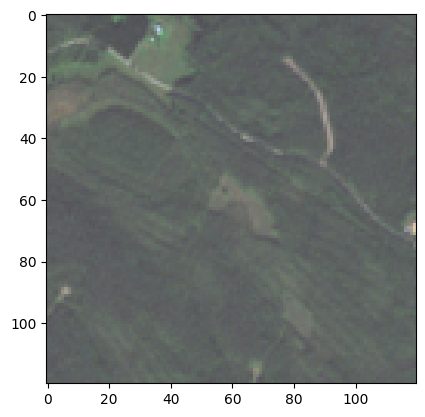

In [ ]:
print(train_features.size())

print(train_labels.size())
print(train_labels[0])
img = train_features[1].squeeze()
plt.imshow(img.permute(1, 2, 0))

In [ ]:
class MocoV2(LightningModule):

    def __init__(self, base_encoder, emb_dim, num_negatives, emb_spaces=1, *args, **kwargs):
        super().__init__()
        self.save_hyperparameters()

        # create the encoders
        template_model = getattr(torchvision.models, base_encoder)
        self.encoder_q = template_model(num_classes=self.hparams.emb_dim)
        self.encoder_k = template_model(num_classes=self.hparams.emb_dim)

        # remove fc layer
        self.encoder_q = nn.Sequential(*list(self.encoder_q.children())[:-1], nn.Flatten())
        self.encoder_k = nn.Sequential(*list(self.encoder_k.children())[:-1], nn.Flatten())

        for param_q, param_k in zip(self.encoder_q.parameters(), self.encoder_k.parameters()):
            param_k.data.copy_(param_q.data)  # initialize
            param_k.requires_grad = False  # not update by gradient

        # create the projection heads
        self.mlp_dim = 512 * (1 if base_encoder in ['resnet18', 'resnet34'] else 4)
        self.heads_q = nn.ModuleList([
            nn.Sequential(nn.Linear(self.mlp_dim, self.mlp_dim), nn.ReLU(), nn.Linear(self.mlp_dim, emb_dim))
            for _ in range(emb_spaces)
        ])
        self.heads_k = nn.ModuleList([
            nn.Sequential(nn.Linear(self.mlp_dim, self.mlp_dim), nn.ReLU(), nn.Linear(self.mlp_dim, emb_dim))
            for _ in range(emb_spaces)
        ])

        for param_q, param_k in zip(self.heads_q.parameters(), self.heads_k.parameters()):
            param_k.data.copy_(param_q.data)  # initialize
            param_k.requires_grad = False  # not update by gradient

        # create the queue
        self.register_buffer("queue", torch.randn(emb_spaces, emb_dim, num_negatives))
        self.queue = nn.functional.normalize(self.queue, dim=1)

        self.register_buffer("queue_ptr", torch.zeros(emb_spaces, 1, dtype=torch.long))

    @torch.no_grad()
    def _momentum_update_key_encoder(self):
        """
        Momentum update of the key encoder
        """
        for param_q, param_k in zip(self.encoder_q.parameters(), self.encoder_k.parameters()):
            em = self.hparams.encoder_momentum
            param_k.data = param_k.data * em + param_q.data * (1. - em)
        for param_q, param_k in zip(self.heads_q.parameters(), self.heads_k.parameters()):
            em = self.hparams.encoder_momentum
            param_k.data = param_k.data * em + param_q.data * (1. - em)

    @torch.no_grad()
    def _dequeue_and_enqueue(self, keys, queue_idx):
        # gather keys before updating queue
        if self.use_ddp or self.use_ddp2:
            keys = concat_all_gather(keys)

        batch_size = keys.shape[0]

        ptr = int(self.queue_ptr[queue_idx])
        assert self.hparams.num_negatives % batch_size == 0  # for simplicity

        # replace the keys at ptr (dequeue and enqueue)
        self.queue[queue_idx, :, ptr:ptr + batch_size] = keys.T
        ptr = (ptr + batch_size) % self.hparams.num_negatives  # move pointer

        self.queue_ptr[queue_idx] = ptr

    def forward(self, img_q, img_k):
        """
        Input:
            img_q: a batch of query images
            img_k: a batch of key images
        Output:
            logits, targets
        """

        # update the key encoder
        self._momentum_update_key_encoder()

        # compute query features
        v_q = self.encoder_q(img_q)

        # compute key features
        v_k = []
        for i in range(self.hparams.emb_spaces):
            # shuffle for making use of BN
            if self.use_ddp or self.use_ddp2:
                img_k[i], idx_unshuffle = batch_shuffle_ddp(img_k[i])

            with torch.no_grad():  # no gradient to keys
                v_k.append(self.encoder_k(img_k[i]))

            # undo shuffle
            if self.use_ddp or self.use_ddp2:
                v_k[i] = batch_unshuffle_ddp(v_k[i], idx_unshuffle)

        logits = []
        for i in range(self.hparams.emb_spaces):
            # compute query projections
            z_q = self.heads_q[i](v_q)  # queries: NxC
            z_q = nn.functional.normalize(z_q, dim=1)

            # compute key projections
            z_k = []
            for j in range(self.hparams.emb_spaces):
                with torch.no_grad():  # no gradient to keys
                    z_k.append(self.heads_k[i](v_k[j]))  # keys: NxC
                    z_k[j] = nn.functional.normalize(z_k[j], dim=1)

            # select positive and negative pairs
            z_pos = z_k[i]
            z_neg = self.queue[i].clone().detach()
            if i > 0:  # embedding space 0 is invariant to all augmentations
                z_neg = torch.cat([z_neg, *[z_k[j].T for j in range(self.hparams.emb_spaces) if j != i]], dim=1)

            # compute logits
            # Einstein sum is more intuitive
            l_pos = torch.einsum('nc,nc->n', z_q, z_pos).unsqueeze(-1)  # positive logits: Nx1
            l_neg = torch.einsum('nc,ck->nk', z_q, z_neg)  # negative logits: NxK

            l = torch.cat([l_pos, l_neg], dim=1)  # logits: Nx(1+K)
            l /= self.hparams.softmax_temperature  # apply temperature
            logits.append(l)

            # dequeue and enqueue
            self._dequeue_and_enqueue(z_k[i], queue_idx=i)

        # targets: positive key indicators
        targets = torch.zeros(logits[0].shape[0], dtype=torch.long)
        targets = targets.type_as(logits[0])

        return logits, targets

    def training_step(self, batch, batch_idx):
        img_q, img_k = batch
        if self.hparams.emb_spaces == 1 and isinstance(img_k, torch.Tensor):
            img_k = [img_k]

        output, target = self(img_q, img_k)

        losses = []
        accuracies = []
        for out in output:
            losses.append(F.cross_entropy(out.float(), target.long()))
            accuracies.append(precision_at_k(out, target, top_k=(1,))[0])
        loss = torch.sum(torch.stack(losses))

        log = {'train_loss': loss}
        for i, acc in enumerate(accuracies):
            log[f'train_acc/subspace{i}'] = acc

        self.log_dict(log, on_step=True, on_epoch=False, prog_bar=True)
        return loss

    def configure_optimizers(self):
        params = chain(self.encoder_q.parameters(), self.heads_q.parameters())
        optimizer = optim.SGD(params, self.hparams.learning_rate,
                              momentum=self.hparams.momentum,
                              weight_decay=self.hparams.weight_decay)
        return optimizer

    @staticmethod
    def add_model_specific_args(parent_parser):
        parser = ArgumentParser(parents=[parent_parser], add_help=False)
        parser.add_argument('--base_encoder', type=str, default='resnet18')
        parser.add_argument('--emb_dim', type=int, default=128)
        parser.add_argument('--num_workers', type=int, default=32)
        parser.add_argument('--num_negatives', type=int, default=16384)
        parser.add_argument('--encoder_momentum', type=float, default=0.999)
        parser.add_argument('--softmax_temperature', type=float, default=0.07)
        parser.add_argument('--learning_rate', type=float, default=0.03)
        parser.add_argument('--momentum', type=float, default=0.9)
        parser.add_argument('--weight_decay', type=float, default=1e-4)
        parser.add_argument('--batch_size', type=int, default=256)
        return parser


In [ ]:
model = MocoV2.load_from_checkpoint("gdrive/MyDrive/seco_resnet18_1m.ckpt")
backbone = deepcopy(model.encoder_q)
backbone.cuda()

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/migration/migration.py:195: PossibleUserWarning: You have multiple `ModelCheckpoint` callback states in this checkpoint, but we found state keys that would end up colliding with each other after an upgrade, which means we can't differentiate which of your checkpoint callbacks needs which states. At least one of your `ModelCheckpoint` callbacks will not be able to reload the state.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.1.4 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file gdrive/MyDrive/seco_resnet18_1m.ckpt`


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [ ]:
def forward_pass(net, num_steps, data, backbone):
  #data = data.view(batch_size, -1)
  with torch.no_grad():
    feats = backbone(data)
  mem_rec = []
  spk_rec = []
  utils.reset(net)  # resets hidden states for all LIF neurons in net
  spike_data = spikegen.rate(feats, num_steps=num_steps, gain=1)

  for step in range(num_steps):
      spk_out, syn_out, mem_out = net(spike_data[0])
      spk_rec.append(spk_out)
      mem_rec.append(mem_out)

  return torch.stack(spk_rec), torch.stack(mem_rec)

In [ ]:
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=torch.Tensor([20.]).cuda())
num_steps = 20
metric = MultilabelAveragePrecision(num_labels=19, average=None, thresholds=None).to('cuda')

In [ ]:
def batch_accuracy(train_loader, net, num_steps):
  with torch.no_grad():
    total = 0
    acc = 0
    net.eval()

    scores = []

    train_loader = iter(train_loader)
    for data, targets in train_loader:
      data = data.to(device)
      targets = targets.to(device)
      spk_rec, _ = forward_pass(net, num_steps, data, backbone)
      spike_count = torch.sum(spk_rec, 0).cuda()
      scores.append(metric(spike_count, targets.int()))

  return torch.nanmean(torch.stack(scores))

In [ ]:
def train():

  hidden = 124
  hidden2 = 2048

  output = 19

  init_alpha = torch.rand(hidden)
  init_beta = torch.rand(hidden)

  init_alpha2 = torch.rand(hidden2)
  init_beta2 = torch.rand(hidden2)

  out_alpha = torch.rand(output)
  out_beta = torch.rand(output)

  net = nn.Sequential(nn.Linear(512, hidden2),
                      snn.Synaptic(alpha=init_alpha2, beta=init_beta2, learn_alpha=True, learn_beta=True, learn_threshold=True, init_hidden=True),
                      nn.Linear(hidden2, output),
                      snn.Synaptic(alpha=out_alpha, beta=out_beta, learn_alpha=True, learn_beta=True, learn_threshold=True, init_hidden=True, output=True)
                      ).to(device)
  optimizer = torch.optim.Adam(net.parameters(), lr=1e-5)
  num_epochs = 100
  loss_hist = []
  test_acc_hist = []
  epoch_counter = 0

  # Outer training loop
  for epoch in range(num_epochs):

      epoch_counter += 1
      counter = 0

      # Training loop
      for data, targets in iter(train_dataloader):
          data = data.to(device)
          targets = targets.to(device)

          # forward pass
          net.train()
          spk_rec, _ = forward_pass(net, num_steps, data, backbone)
          spike_count = torch.sum(spk_rec, 0)

          # initialize the loss & sum over time
          loss_val = loss_fn(spike_count, targets)

          # Gradient calculation + weight update
          optimizer.zero_grad()
          loss_val.backward()
          optimizer.step()

          # Store loss history for future plotting
          loss_hist.append(loss_val.item())

          # Test set
          if counter % 1000 == 0:
            with torch.no_grad():
                net.eval()

                # Test set forward pass
                test_acc = batch_accuracy(test_dataloader, net, num_steps)
                print(f"Epoch {epoch_counter}, Iteration {counter}, Test mean avereage precision: {test_acc * 100:.2f}%\n")
                test_acc_hist.append(test_acc.item())

          counter += 1

  return net

In [ ]:
def test(alpha, beta, net):
  with torch.no_grad():
      net.eval()
      test_acc = batch_accuracy(test_dataloader, net, num_steps)
      print(f"Alpha {alpha}, Beta {beta}, Test mean avereage precision: {test_acc * 100:.2f}%")


In [ ]:
time_start = time.time()
train()
print(time.time()-time_start, "seconds\n")

Epoch 1, Iteration 0, Test mean avereage precision: 17.25%

Epoch 2, Iteration 0, Test mean avereage precision: 24.18%

Epoch 3, Iteration 0, Test mean avereage precision: 27.15%

Epoch 4, Iteration 0, Test mean avereage precision: 30.27%

Epoch 5, Iteration 0, Test mean avereage precision: 32.46%

Epoch 6, Iteration 0, Test mean avereage precision: 33.84%

Epoch 7, Iteration 0, Test mean avereage precision: 34.94%

Epoch 8, Iteration 0, Test mean avereage precision: 36.02%

Epoch 9, Iteration 0, Test mean avereage precision: 36.24%

Epoch 10, Iteration 0, Test mean avereage precision: 36.70%

Epoch 11, Iteration 0, Test mean avereage precision: 36.91%

Epoch 12, Iteration 0, Test mean avereage precision: 37.01%

Epoch 13, Iteration 0, Test mean avereage precision: 37.07%

Epoch 14, Iteration 0, Test mean avereage precision: 37.31%

Epoch 15, Iteration 0, Test mean avereage precision: 37.54%

Epoch 16, Iteration 0, Test mean avereage precision: 37.84%

Epoch 17, Iteration 0, Test mean 